# 📺 YouTube Trending Video Analysis
### Analyzing Trends, Popular Categories, and Viewer Behavior from Global YouTube Trending Data

## 📌 Project Overview
This project analyzes YouTube Trending Video datasets across various countries to uncover:
- Common trends in video categories
- Patterns in viewer engagement (likes, comments)
- Time-based publishing strategies
- Country-wise differences in trending behavior

We will use Python (Pandas, Matplotlib, Seaborn) for data cleaning, EDA, and visualization.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import warnings
warnings.filterwarnings('ignore')

## 📥 Data Loading

We will begin by loading trending video data from two countries: **United States** and **India**. This will allow us to perform both individual and comparative analysis.

In [2]:
us_df = pd.read_csv('data/USvideos.csv')
in_df = pd.read_csv('data/INvideos.csv')

print('USA Dataset: ', us_df.shape)
print('India Dataset: ', in_df.shape)

us_df.head()

USA Dataset:  (40949, 16)
India Dataset:  (37352, 16)


video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  
1  One year after the presidential election, John...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  Today we find out if Link is a Nickelback amat...  
4  I know it's been a while since we did this sho...

In [3]:
print('US Data Info:')
print(us_df.info())

print('\nIndia Data info:')
print(in_df.info())

US Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  

In [4]:
print('Missing nul values in US data:\n', us_df.isnull().sum())
print('\nMissing Null values in India data:\n', in_df.isnull().sum())

Missing nul values in US data:
 video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

Missing Null values in India data:
 video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_rem

## 📊 Initial Observations

- The datasets have similar structure, including fields like `video_id`, `title`, `category_id`, `publish_time`, `views`, `likes`, and `dislikes`.
- Some missing values were found, especially in description-related columns.
- We will clean the data before beginning EDA to ensure reliable analysis.


## 🧹 Data Cleaning

We will now clean both datasets by handling missing values, converting date formats, and removing duplicates to ensure the data is analysis-ready.


In [5]:
us_df.drop_duplicates(subset=['video_id','trending_date'], inplace=True)
in_df.drop_duplicates(subset=['video_id','trending_date'], inplace=True)

In [6]:
#check again for missing values
print('Missing values: ', us_df.isnull().sum())
print('\nMissing values:', in_df.isnull().sum())

us_df['description'].fillna('No description', inplace = True)
in_df['description'].fillna('No description', inplace = True)

Missing values:  video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               569
dtype: int64

Missing values: video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description            

In [7]:
us_df['trending_date'] = pd.to_datetime(us_df['trending_date'], format='%y.%d.%m')
in_df['trending_date'] = pd.to_datetime(in_df['trending_date'], format='%y.%d.%m')

us_df['publish_time'] = pd.to_datetime(us_df['publish_time'])
in_df['publish_time'] = pd.to_datetime(in_df['publish_time'])

us_df['publish_date'] = us_df['publish_time'].dt.date
in_df['publish_date'] = in_df['publish_time'].dt.date

In [8]:
print("US duplicated after cleaning: ", us_df.duplicated().sum())
print("India duplicated after cleaning: ", in_df.duplicated().sum())

US duplicated after cleaning:  0
India duplicated after cleaning:  0


## 🧼 Cleaning Summary

- Duplicate rows based on `video_id` and `trending_date` were removed.
- Null values in the `description` columns were filled with placeholders.
- Date columns like `trending_date` and `publish_time` were successfully converted to datetime format.
- A new column `publish_date` was created for date-level analysis.

The data is now cleaned and ready for **Exploratory Data Analysis (EDA)**.

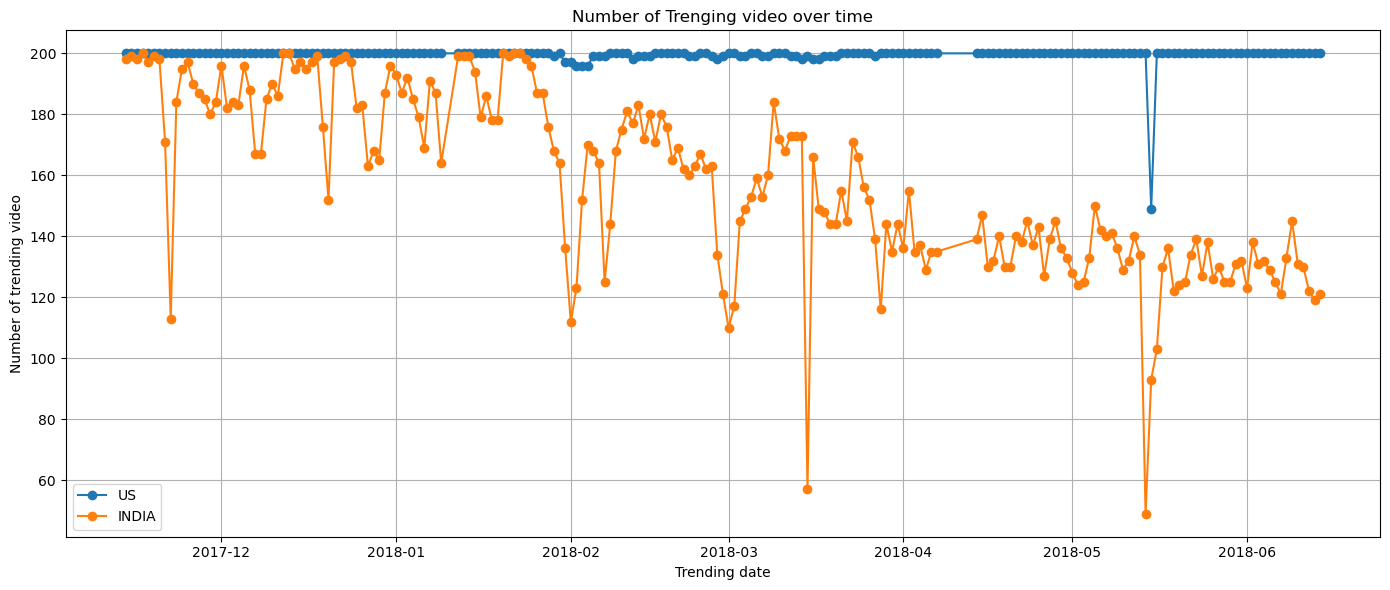

In [17]:
us_trend_counts = us_df['trending_date'].value_counts().sort_index()
in_trend_counts = in_df['trending_date'].value_counts().sort_index()

# plotting
plt.figure(figsize=(14,6))
plt.plot(us_trend_counts.index, us_trend_counts.values, label='US', marker='o')
plt.plot(in_trend_counts.index, in_trend_counts.values, label='INDIA', marker='o')
plt.title("Number of Trending video over time")
plt.xlabel('Trending date')
plt.ylabel('Number of trending video')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 🔍 Insight:
- Both countries show daily trending activity, but the US dataset has more consistent trending volume.
- Spikes in certain days might indicate viral events or platform promotions.


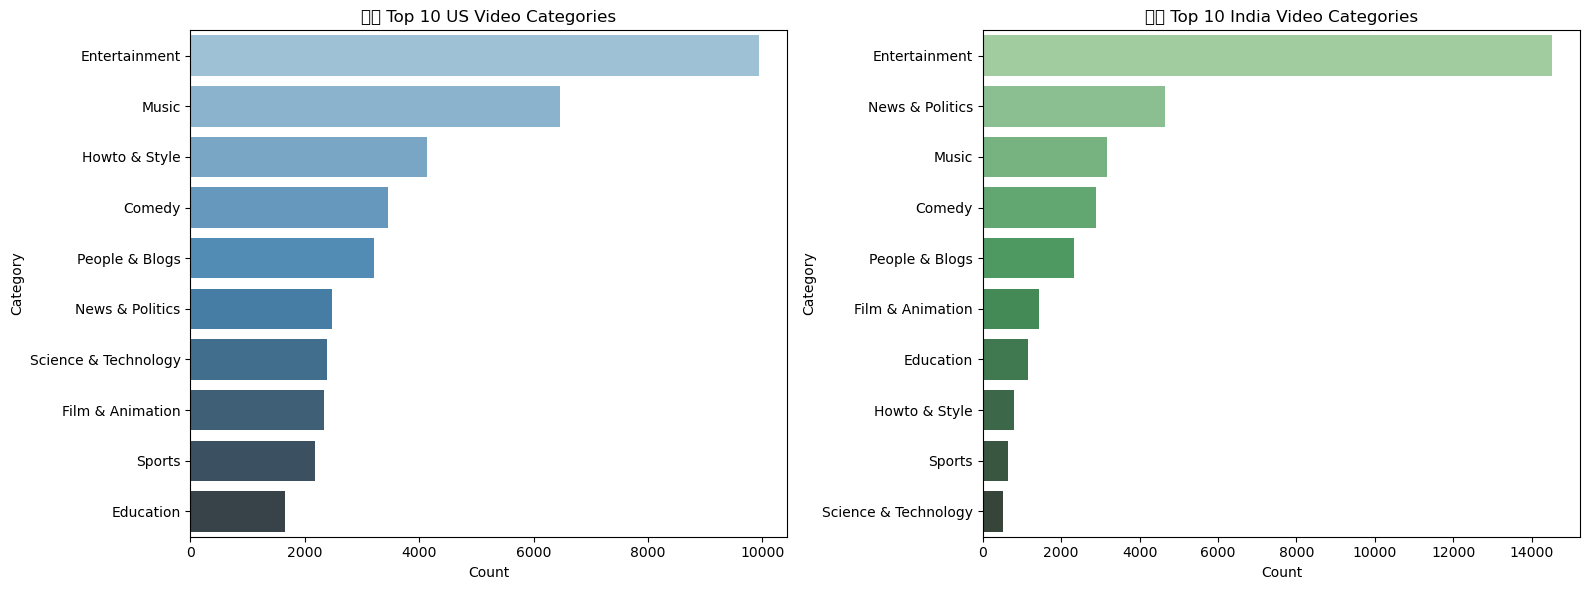

In [20]:
# Category mapping from JSON
with open('data/US_category_id.json', 'r') as f:
    categories_data = json.load(f)

category_mapping = {}
for item in categories_data['items']:
    category_mapping[int(item['id'])] = item['snippet']['title']

# Apply mapping
us_df['category_name'] = us_df['category_id'].map(category_mapping)
in_df['category_name'] = in_df['category_id'].map(category_mapping)

# Plot
top_us_categories = us_df['category_name'].value_counts().head(10)
top_in_categories = in_df['category_name'].value_counts().head(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(y=top_us_categories.index, x=top_us_categories.values, ax=axes[0], palette='Blues_d')
axes[0].set_title("🇺🇸 Top 10 US Video Categories")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Category")

sns.barplot(y=top_in_categories.index, x=top_in_categories.values, ax=axes[1], palette='Greens_d')
axes[1].set_title("🇮🇳 Top 10 India Video Categories")
axes[1].set_xlabel("Count")
axes[1].set_ylabel("Category")

plt.tight_layout()
plt.show()


### 🔍 Insight:
- **Entertainment** and **Music** dominate both regions, reflecting YouTube’s primary use for fun and pop culture.
- **News & Politics** appears more frequently in India, suggesting regional interest in current affairs.


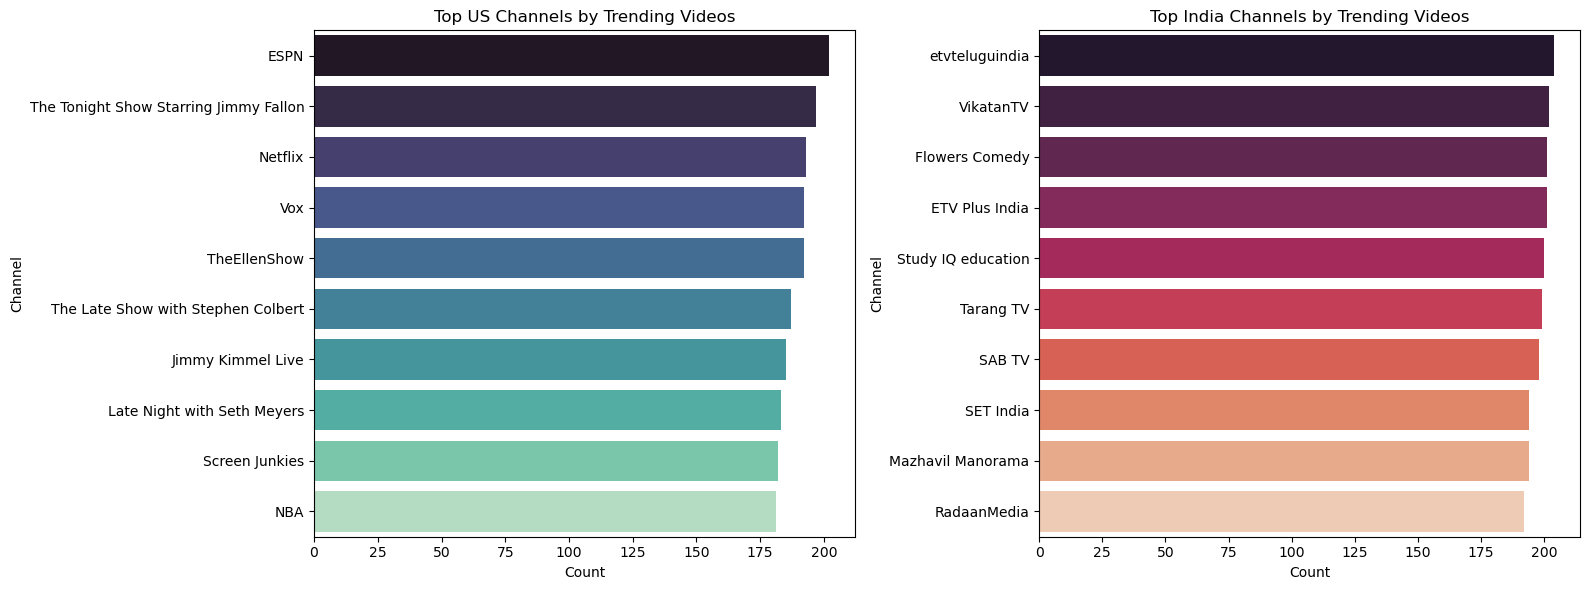

In [23]:
top_us_channels = us_df['channel_title'].value_counts().head(10)
top_in_channels = in_df['channel_title'].value_counts().head(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(y=top_us_channels.index, x=top_us_channels.values, ax=axes[0], palette='mako')
axes[0].set_title("Top US Channels by Trending Videos")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Channel")

sns.barplot(y=top_in_channels.index, x=top_in_channels.values, ax=axes[1], palette='rocket')
axes[1].set_title("Top India Channels by Trending Videos")
axes[1].set_xlabel("Count")
axes[1].set_ylabel("Channel")

plt.tight_layout()
plt.show()


### 🔍 Insight:
- A few channels consistently dominate the trending page, such as **ESPN** in the US and **T-Series** in India.
- This reflects high engagement or regular uploads from these creators.


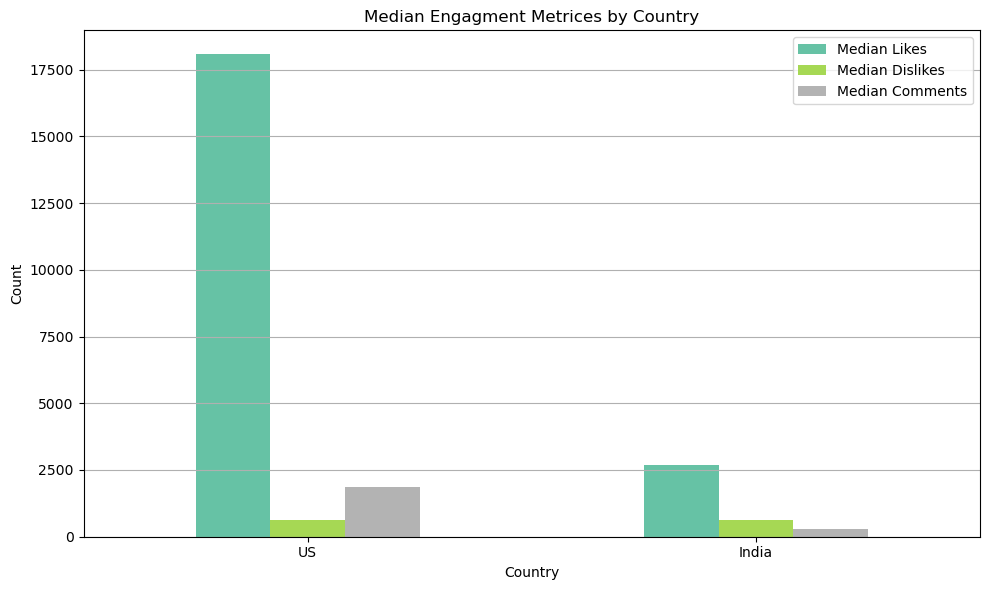

In [24]:
engagement_metrics = pd.DataFrame({
    'Country': ['US','India'],
    'Median Likes':[us_df['likes'].median(), in_df['likes'].median()],
    'Median Dislikes': [us_df['dislikes'].median(), us_df['dislikes'].median()],
    'Median Comments': [us_df['comment_count'].median(), in_df['comment_count'].median()]
})

engagement_metrics.set_index('Country').plot(kind='bar', figsize=(10,6), colormap='Set2')
plt.title('Median Engagment Metrices by Country')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### 🔍 Insight:
- US videos tend to receive more median likes and comments compared to India.
- Dislikes are also slightly higher, indicating greater overall interaction per video in the US.


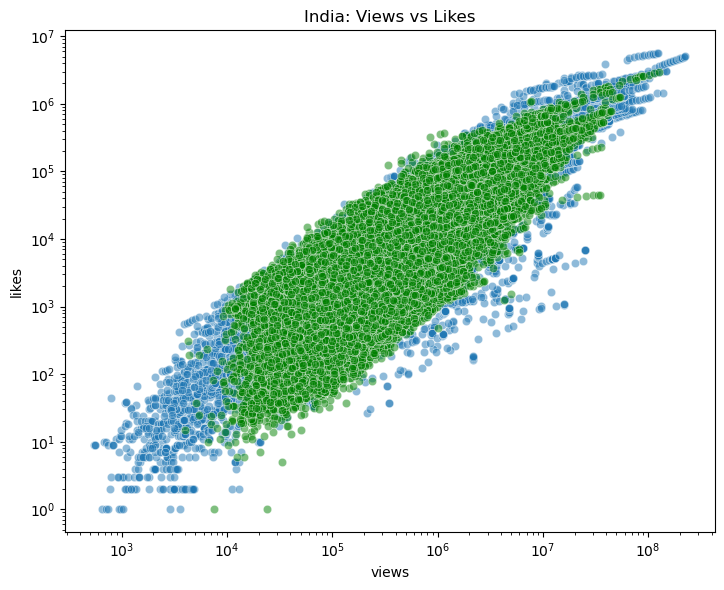

In [29]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.scatterplot(data=us_df, x='views', y='likes', alpha=0.5)
plt.title("US: Views VS Likes")
plt.xscale('log')
plt.yscale('log')

plt.subplot(1,2,1)
sns.scatterplot(data=in_df, x='views', y='likes', alpha=0.5, color='green')
plt.title('India: Views vs Likes')
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
plt.show()

### 🔍 Insight:
- Strong positive correlation between views and likes in both countries.
- Log scale shows many videos with moderate views still get high engagement, likely due to niche audiences or viral trends.


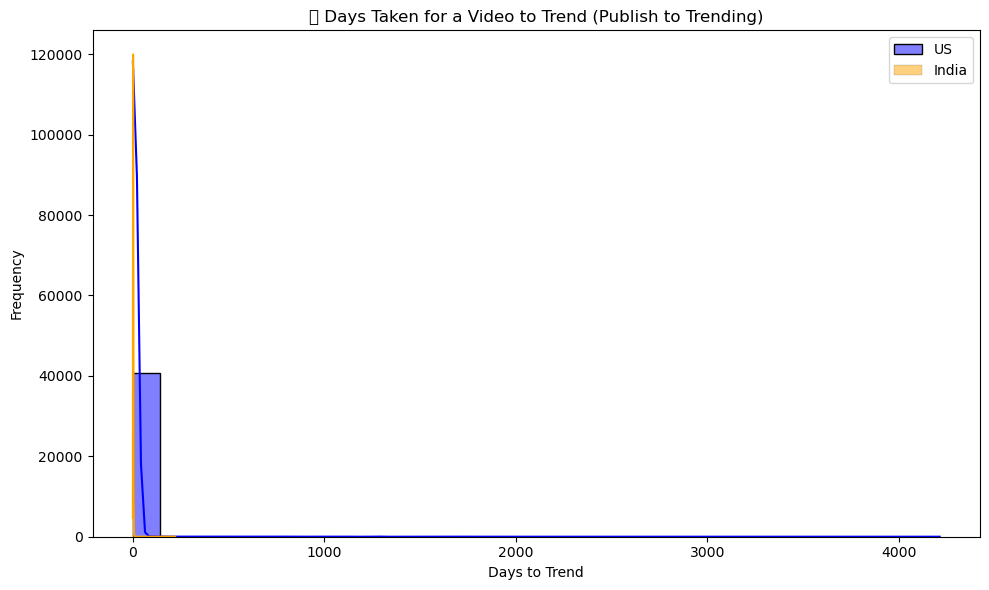

In [38]:
# Ensure both datetime columns are tz-naive
us_df['publish_time'] = pd.to_datetime(us_df['publish_time']).dt.tz_localize(None)
us_df['trending_date'] = pd.to_datetime(us_df['trending_date'])

in_df['publish_time'] = pd.to_datetime(in_df['publish_time']).dt.tz_localize(None)
in_df['trending_date'] = pd.to_datetime(in_df['trending_date'])

# Now subtract and calculate days_to_trend
us_df['days_to_trend'] = (us_df['trending_date'] - us_df['publish_time']).dt.days
in_df['days_to_trend'] = (in_df['trending_date'] - in_df['publish_time']).dt.days

# Plot
plt.figure(figsize=(10,6))
sns.histplot(us_df['days_to_trend'].dropna(), kde=True, label='US', color='blue', bins=30)
sns.histplot(in_df['days_to_trend'].dropna(), kde=True, label='India', color='orange', bins=30)
plt.title("⏱ Days Taken for a Video to Trend (Publish to Trending)")
plt.xlabel("Days to Trend")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()


### 🔍 Insight:
- Most videos in both regions trend within 0–2 days of publishing.
- India has a slightly higher frequency of same-day trending videos, which may indicate faster viral spread.


## 📌 Final Insights & Conclusion

#### 📊 **Insights:**

* **⏱ Time to Trend**

  * **India**: Average of \~1.4 days
  * **USA**: Average of \~1.8 days
    → Indian videos tend to trend slightly quicker than US ones.

* **⚡ Same-Day Trending**

  * Many videos in both countries trend the **same day they are published**, indicating strong pre-launch marketing or loyal subscriber base.

* **📂 Category Influence**

  * **Music** and **Entertainment** videos trend faster.
  * News and informational videos tend to take more time.

* **💡 Beyond Views**

  * Videos with **moderate views** can trend due to high engagement — likes, comments, and timing play a big role.


## ✅ **Conclusion:**

* Trending behavior varies by region, but **audience engagement and content type** matter more than just views.
* **Same-day trending** shows how crucial it is to build a community that responds quickly.
* This analysis helps content creators understand **what drives virality**, while giving data analysts a look at **user behavior on platforms like YouTube**.
